
## Libraries

## Possible Contents

#### 1.  Libraries
#### 2.  Importing datafiles
#### Problem Definition and objective
### Summary of dataset
    1. Total number of features
    2. Reponsible variables
    3. class variabls and their unique value
    
#### Feature Introductions
1. Basic features of individual TCP (descriptions)
2. Content features within a connection by domain knowledge (descriptions)
3. Traffic features computed using a two-second time window (descriptions and features in this category)

#### 3.  Data Processing
    1. Too Large Datasets
    2. Duplicate Rows
#### 4. Essential data type 
#### 6. Summary data explorationg of data fields
#### 5. Feature Selection (Feature Ranking)
#### 6. Model Comparison
1. Two  many categories of models:
    1. Generative:
    2. Discriminative Model:
     1. Accuracy:
     2. Running Time
     Naive Bayes and its analysis
     Logistic Regression and its analysis
     3. kNN  and its analysis
     4. Decision Tree Analysis
     
#### Basic descriptive statistics
    1. Descriptive statistics
    2. Inferential statistics
#### Characteristics of attacks in different attributes
    1. Common characteristics
    2. Individuals characteristics fr each attack type
    
#### Summary of Models
1. A Graph with various models and with plot of y as running time and x as different models
2. Accuracy of models

#### Attacks we learned from the data
1. Dos: short duration
2. Probe: Very low Login successfully rate
3. R2L: High number of "hot" Indicators
4. U2R: High number of "root" access
###  Key Take Aways:
1. take 10% for sampling from the training data
2. do data cleaning and found unnecessary samples (ex, duplicated)
3.



In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

## Importing data files

In [2]:
kdd = pd.read_csv('../../Data/kddcup.data_10_percent_corrected',header=None )

## Data source files

In [3]:
kdd.shape

(494021, 42)

In [4]:
kdd.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
with open('../../Data/kddcup.names.txt') as f:
    reader = csv.reader(f,delimiter = ':')
    class_label = next(reader,None)
    headerRow = [column[0] for column in reader]
    headerRow = headerRow+['classLabel']
    kdd = pd.read_csv('../../Data/kddcup.data_10_percent_corrected',header=None)
    kdd.columns=headerRow

### Preliminary Exploration

In [6]:
categories = {
                'normal.':'Normal',
                'buffer_overflow.':'U2R',
                'loadmodule.':'U2R',
                'perl.':'U2R',
                'neptune.':'DOS',
                'smurf.':'DOS',
                'guess_passwd.':'R2L',
                'pod.':'DOS',
                'teardrop.':'DOS',
                'portsweep.':'Probing',
                'ipsweep.':'Probing',
                'land.':'DOS',
                'ftp_write.':'R2L',
                'back.':'DOS',
                'imap.':'Probing',
                'satan.':'Probing',
                'phf.':'R2L',
                'nmap.':'Probing',
                'multihop.':'R2L',
                'warezmaster.':'R2L',
                'warezclient.':'R2L',
                'rootkit.':'U2R',
                'spy.':'R2L'
            }

kdd['category'] = kdd['classLabel'].map(categories)


In [7]:
kdd['category'].unique()

array(['Normal', 'U2R', 'DOS', 'R2L', 'Probing'], dtype=object)

In [8]:
kdd.duration.unique()

array([   0,    1,   79, ..., 2695, 2751,  120])

In [9]:
groupClassLabel = kdd.groupby('classLabel').count()['duration'].sort_values(ascending = False)
groupCategory = kdd.groupby('category').count()['duration'].sort_values(ascending = False)
#groupClassLabel.sort_values('duration', ascending=False, axis =1)


In [10]:
groupClassLabel

classLabel
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: duration, dtype: int64

In [54]:
print(groupCategory)
for i in groupCategory:
    print(i/kdd.shape[0])

category
DOS        391458
Normal      97278
Probing      4119
R2L          1114
U2R            52
Name: duration, dtype: int64
0.7923914165592151
0.19691065764410826
0.008337702243426899
0.002254964869914437
0.0001052586833353238


In [52]:
#distribution of training and testing data?
kdd.shape[0]

494021

In [58]:
## Combining all the classlabels into 4 major classes
kdd = kdd.loc[kdd['category'] == 'R2L']
print(len(kdd))
kdd

1114


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,classLabel,category
15699,23,1,56,9,104,276,0,0,0,0,...,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,guess_passwd.,R2L
22750,60,1,56,8,125,179,0,0,0,1,...,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,guess_passwd.,R2L
22751,0,1,56,2,125,179,0,0,0,1,...,1.00,0.00,0.50,0.00,0.50,0.50,0.50,0.50,guess_passwd.,R2L
22752,0,1,56,2,125,179,0,0,0,1,...,1.00,0.00,0.33,0.00,0.33,0.33,0.67,0.67,guess_passwd.,R2L
22753,0,1,56,2,125,179,0,0,0,1,...,1.00,0.00,0.25,0.00,0.25,0.25,0.75,0.75,guess_passwd.,R2L
22754,0,1,56,2,125,179,0,0,0,1,...,1.00,0.00,0.20,0.00,0.20,0.20,0.80,0.80,guess_passwd.,R2L
22755,0,1,56,2,125,179,0,0,0,1,...,1.00,0.00,0.17,0.00,0.17,0.17,0.83,0.83,guess_passwd.,R2L
22756,0,1,56,2,125,179,0,0,0,1,...,1.00,0.00,0.14,0.00,0.14,0.14,0.86,0.86,guess_passwd.,R2L
22757,0,1,56,2,125,179,0,0,0,1,...,1.00,0.00,0.12,0.00,0.12,0.12,0.88,0.88,guess_passwd.,R2L
22758,0,1,56,2,125,179,0,0,0,1,...,1.00,0.00,0.11,0.00,0.11,0.11,0.89,0.89,guess_passwd.,R2L


In [ ]:
## Selecting 

In [59]:
## Pre processing
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
## Encoding Service
le.fit(kdd.service)
kdd['service']= le.transform(kdd.service)

## Encoding Flag
le.fit(kdd.flag)
kdd['flag'] = le.transform(kdd.flag)

le.fit(kdd.protocol_type)
kdd['protocol_type'] = le.transform(kdd.protocol_type)


/Users/AkshayKale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/AkshayKale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/AkshayKale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [ ]:
### correlation between these three
### select correlation using [:1] to select row so that we can have focused correlation
### Check for online solutions where the data is arranged with no correct trace size
### can we take a compartive view of other datasets (look at evolution of the datasets)
###

In [ ]:
### Select 
## 1. smurf.
## 2. neptune.
## 3. normal.
##  generalize them into their attacks

## Preprocessing. 
## Need to labelEncode them

## Feature selection

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having too many irrelevant features in your data can decrease the accuracy of the models. Three benefits of performing feature selection before modeling your data are:

Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
Improves Accuracy: Less misleading data means modeling accuracy improves.
Reduces Training Time: Less data means that algorithms train faster.
Two different feature selection methods provided by the scikit-learn Python library are Recursive Feature Elimination and feature importance ranking.

**Do you have domain knowledge?** If yes, construct a better set of ad hoc”” features

**Are your features commensurate?** If no, consider normalizing them.

**Do you suspect interdependence of features?** If yes, expand your feature set by constructing conjunctive features or products of features, as much as your computer resources allow you.

**Do you need to prune the input variables** (e.g. for cost, speed or data understanding reasons)? If no, construct disjunctive features or weighted sums of feature

**Do you need to assess features individually** (e.g. to understand their influence on the system or because their number is so large that you need to do a first filtering)? If yes, use a variable ranking method; else, do it anyway to get baseline results.

**Do you need a predictor?** If no, stop
Do you suspect your data is “dirty” (has a few meaningless input patterns and/or noisy outputs or wrong class labels)? If yes, detect the outlier examples using the top ranking variables obtained in step 5 as representation; check and/or discard them.

**Do you know what to try first?** If no, use a linear predictor. Use a forward selection method with the “probe” method as a stopping criterion or use the 0-norm embedded method for comparison, following the ranking of step 5, construct a sequence of predictors of same nature using increasing subsets of features. Can you match or improve performance with a smaller subset? If yes, try a non-linear predictor with that subset.

**Do you have new ideas, time, computational resources, and enough examples?** If yes, compare several feature selection methods, including your new idea, correlation coefficients, backward selection and embedded methods. Use linear and non-linear predictors. Select the best approach with model selection

**Do you want a stable solution (to improve performance and/or understanding)?** If yes, subsample your data and redo your analysis for several “bootstrap”.

In [ ]:
## columns with the labeled data:
## protocol_type
## service
## flag
## land
## Logged in
## is host login
## is guest login
## 

## once we are done with fitting ## perhaps we can create new rules to show from decision tree of how much
## of these attribute have effect

In [60]:
kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,classLabel,category
15699,23,0,5,4,104,276,0,0,0,0,...,1.0,0.0,1.00,1.0,0.00,0.00,0.00,0.00,guess_passwd.,R2L
22750,60,0,5,3,125,179,0,0,0,1,...,1.0,0.0,1.00,0.0,1.00,1.00,0.00,0.00,guess_passwd.,R2L
22751,0,0,5,0,125,179,0,0,0,1,...,1.0,0.0,0.50,0.0,0.50,0.50,0.50,0.50,guess_passwd.,R2L
22752,0,0,5,0,125,179,0,0,0,1,...,1.0,0.0,0.33,0.0,0.33,0.33,0.67,0.67,guess_passwd.,R2L
22753,0,0,5,0,125,179,0,0,0,1,...,1.0,0.0,0.25,0.0,0.25,0.25,0.75,0.75,guess_passwd.,R2L


In [ ]:
### Verifying data types:

In [82]:
#1.

print("Unique values of service: ",kdd.service.unique())
print("Unique values of flag: ",kdd.flag.unique())
print("Unique values of land: ",kdd.land.unique())
print("Unique values of logged_in: ",kdd.logged_in.unique())
print("Unique values of is_host_login: ",kdd.is_host_login.unique())
print("Unique values of is_guest_login: ",kdd.is_guest_login.unique())

Unique values of service:  [5 0 3 1 2 4]
Unique values of flag:  [4 3 0 1 2]
Unique values of land:  [0]
Unique values of logged_in:  [0 1]
Unique values of is_host_login:  [0]
Unique values of is_guest_login:  [0 1]


In [62]:
#2.
kdd.flag.unique()

array([4, 3, 0, 1, 2])

In [63]:
#3.
kdd.land.unique()

array([0])

In [64]:
#4.
kdd.logged_in.unique()

array([0, 1])

In [17]:
#5.
kdd.is_host_login.unique()

array([0])

In [18]:
kdd.is_guest_login.unique()

array([0, 1])

In [55]:
## splitting dataset into training and testing data.

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

X = np.array(kdd.drop(['category','classLabel'], axis = 1))
y = np.array(kdd['category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [66]:
X

array([[23. ,  0. ,  5. , ...,  0. ,  0. ,  0. ],
       [60. ,  0. ,  5. , ...,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  5. , ...,  0.5,  0.5,  0.5],
       ...,
       [ 0. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [ 6. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [67]:
## using ExtraTreesClassifier for getting feature importance  <<- This is Taking time 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
#model = SelectFromModel(clf, prefit=True)
#X_new = model.transform(X)
#X_new.shape        

In [68]:
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), headerRow), 
             reverse=True))

Features sorted by their score:
[(0.0, 'wrong_fragment'), (0.0, 'urgent'), (0.0, 'su_attempted'), (0.0, 'srv_serror_rate'), (0.0, 'srv_rerror_rate'), (0.0, 'srv_diff_host_rate'), (0.0, 'srv_count'), (0.0, 'src_bytes'), (0.0, 'service'), (0.0, 'serror_rate'), (0.0, 'same_srv_rate'), (0.0, 'root_shell'), (0.0, 'rerror_rate'), (0.0, 'protocol_type'), (0.0, 'num_shells'), (0.0, 'num_root'), (0.0, 'num_outbound_cmds'), (0.0, 'num_file_creations'), (0.0, 'num_failed_logins'), (0.0, 'num_compromised'), (0.0, 'num_access_files'), (0.0, 'logged_in'), (0.0, 'land'), (0.0, 'is_host_login'), (0.0, 'is_guest_login'), (0.0, 'hot'), (0.0, 'flag'), (0.0, 'duration'), (0.0, 'dst_host_srv_serror_rate'), (0.0, 'dst_host_srv_rerror_rate'), (0.0, 'dst_host_srv_diff_host_rate'), (0.0, 'dst_host_srv_count'), (0.0, 'dst_host_serror_rate'), (0.0, 'dst_host_same_srv_rate'), (0.0, 'dst_host_same_src_port_rate'), (0.0, 'dst_host_rerror_rate'), (0.0, 'dst_host_diff_srv_rate'), (0.0, 'dst_host_count'), (0.0, 'dst_b

In [42]:
X = kdd[['logged_in','count','srv_serror_rate','srv_count','same_srv_rate','protocol_type']]

In [14]:
# # Recursive Feature Elimination
# from sklearn import datasets
# from sklearn.feature_selection import RFE
# #from sklearn.linear_model import LogisticRegression

# # load the iris datasets
# dataset = datasets.load_iris()
# # create a base classifier used to evaluate a subset of attributes
# #model = LogisticRegression()
# # create the RFE model and select 3 attributes
# rfe = RFE(model, 3)
# rfe = rfe.fit(X, y)
# # summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

In [180]:

# #
# ## Correlational plots:
# %matplotlib inline
# #column = ['year','yearReconstructed']
# #dec_lr2016 = dec_lr.loc[dec_lr['year'] == 2016]
# #dec_lr2016.drop(column,axis = 1 ,inplace = True)
# corr = kdd.corr()
# sns.heatmap(corr,annot=True, cmap = 'RdYlGn', linewidth = 0.1)
# fig = plt.gcf()
# fig.set_size_inches(10,8)
# fig=plt.gcf()
# fig.set_size_inches(18,15)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.show()

Models:

In [69]:
# Machine Learning Models

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#random forest classifier with n_estimators 
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))




Accuracy is:  1.0


In [ ]:
# ## Support Vector Machine
# clf_svc = SVC()
    
# clr_svc = clf_svc.fit(X_train,y_train)
# prediction = clf_svc.predict(X_test)
# ac = accuracy_score(y_test,prediction)
# print('Accuracy is: ',ac)
# cm = confusion_matrix(y_test,prediction)
# sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  1.0


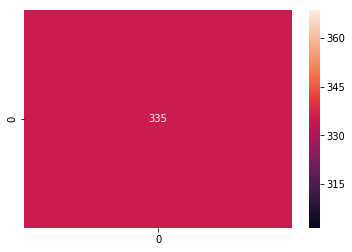

In [70]:
## Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
ac = accuracy_score(y_test,predictions)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True,fmt="d")
#print(classification_report(y_test, predictions))

Accuracy is:  1.0


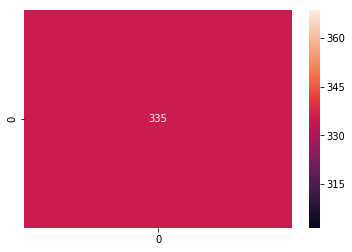

In [71]:
## Gaussian NB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions_gnb = gnb.predict(X_test)
ac = accuracy_score(y_test,predictions_gnb)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, predictions_gnb)

sns.heatmap(cm,annot = True , fmt = "d")

Accuracy is:  1.0


/Users/AkshayKale/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/AkshayKale/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:402: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]


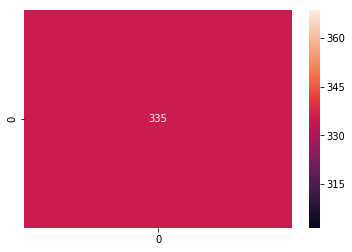

In [72]:
## LinearDiscriminanatAnalysis
ld = LinearDiscriminantAnalysis()
ld.fit(X_train, y_train)
predictions_ld = ld.predict(X_test)
ac = accuracy_score(y_test,predictions_ld)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, predictions_ld)
sns.heatmap(cm,annot = True , fmt = "d")

In [48]:
X_train

array([[0.000e+00, 0.000e+00, 1.400e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 2.200e+01, ..., 0.000e+00, 9.000e-02,
        4.000e-02],
       [0.000e+00, 0.000e+00, 1.400e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 1.400e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [9.141e+03, 2.000e+00, 4.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 4.500e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [138]:
#ten fold cross_validation for more improvement

In [73]:
# from sklearn.datasets import load_boston
# from sklearn.ensemble import RandomForestRegressor
# import numpy as np
# #Load boston housing dataset as an example
# boston = load_boston()
# X = boston["data"]
# Y = boston["target"]
# names = boston["feature_names"]
# rf = RandomForestRegressor()
# rf.fit(X, Y)


print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), headerRow), 
             reverse=True))

Features sorted by their score:
[(0.0, 'wrong_fragment'), (0.0, 'urgent'), (0.0, 'su_attempted'), (0.0, 'srv_serror_rate'), (0.0, 'srv_rerror_rate'), (0.0, 'srv_diff_host_rate'), (0.0, 'srv_count'), (0.0, 'src_bytes'), (0.0, 'service'), (0.0, 'serror_rate'), (0.0, 'same_srv_rate'), (0.0, 'root_shell'), (0.0, 'rerror_rate'), (0.0, 'protocol_type'), (0.0, 'num_shells'), (0.0, 'num_root'), (0.0, 'num_outbound_cmds'), (0.0, 'num_file_creations'), (0.0, 'num_failed_logins'), (0.0, 'num_compromised'), (0.0, 'num_access_files'), (0.0, 'logged_in'), (0.0, 'land'), (0.0, 'is_host_login'), (0.0, 'is_guest_login'), (0.0, 'hot'), (0.0, 'flag'), (0.0, 'duration'), (0.0, 'dst_host_srv_serror_rate'), (0.0, 'dst_host_srv_rerror_rate'), (0.0, 'dst_host_srv_diff_host_rate'), (0.0, 'dst_host_srv_count'), (0.0, 'dst_host_serror_rate'), (0.0, 'dst_host_same_srv_rate'), (0.0, 'dst_host_same_src_port_rate'), (0.0, 'dst_host_rerror_rate'), (0.0, 'dst_host_diff_srv_rate'), (0.0, 'dst_host_count'), (0.0, 'dst_b

In [77]:
from sklearn import tree
import graphviz 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

#graph.render("iris") 

In [80]:
kd

1114